<a href="https://colab.research.google.com/github/Annette-1/Ecuaciones_Diferenciales_Parciales/blob/main/Problemas_de_Sturm_Liouville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:orange;">Problemas de Sturm-Liouville con el uso de  SymPy (Python)</span>

## Resolver la ecuación diferencial

$X''-λX=0 \quad X(0)=X(1)=0$

Importamos la librerias necesarias

In [114]:
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Defininimos las variables

In [115]:
x = sp.symbols('x')
X = sp.Function('X')
k = sp.pi**3  # Valor ejemplo de k

EDO: $X'' + kX = 0$

In [116]:
ode1 = sp.Eq(sp.Derivative(X(x), x, x) + k*X(x), 0)


Solucion general

In [117]:
sol1 = sp.dsolve(ode1, X(x))
C1, C2 = sp.symbols('C1 C2')
sol1_rhs = sol1.rhs
sol1_rhs

C1*sin(pi**(3/2)*x) + C2*cos(pi**(3/2)*x)

Aplicar condiciones: X(0) = 0, X(1) = 0

In [118]:
const1 = sp.solve([sol1_rhs.diff(x).subs(x, 0), sol1_rhs.diff(x).subs(x, 1)], (C1, C2))
if isinstance(const1, dict) and 'C1' in const1 and 'C2' in const1 and all(isinstance(val, sp.Number) for val in const1.values()):
    sol1 = sol1.subs(const1)
else:
    sol1 = sol1.subs({C1: 0, C2: 1})
sol1

Eq(X(x), cos(pi**(3/2)*x))

Convertir a función numérica

In [119]:
func1 = lambdify(x, sol1.rhs, modules=['numpy'])

graficar

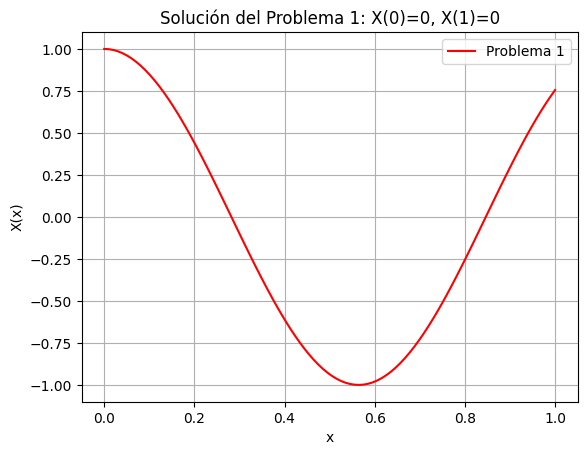

In [120]:
xx = np.linspace(0, 1, 100)
yy1 = func1(xx)

plt.plot(xx, yy1, 'r', label='Problema 1')
plt.xlabel('x')
plt.ylabel('X(x)')
plt.title('Solución del Problema 1: X(0)=0, X(1)=0')
plt.grid(True)
plt.legend()
plt.show()

Resolver la ecuación diferencial

$X''-λX=0 \quad X'(0)=X'(1)=0$

In [149]:
from sympy import *
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [150]:
x = sp.symbols('x')
X = sp.Function('X')
k = sp.pi**2  # Valor ejemplo de k


In [151]:
ode2 = sp.Eq(sp.Derivative(X(x), x, x) + k*X(x), 0)

Solución general

In [152]:
sol2 = sp.dsolve(ode2, X(x))
C3, C4 = sp.symbols('C1 C2')
Xsol2 = sol2.rhs
dXsol2 = Xsol2.diff(x)
sol2

Eq(X(x), C1*sin(pi*x) + C2*cos(pi*x))

 Aplicar condiciones: X'(0) = 0, X'(1) = 0

In [156]:
const2 = sp.solve([dXsol2.subs(x, 0), dXsol2.subs(x, 1)], (C3, C4))

if const2 == [{C3: 0, C4: 0}]:
    sol2 = sol2.subs({C3: 1, C4: 0})
elif isinstance(const2, list) and len(const2) > 0 and isinstance(const2[0], dict):
    sol2 = sol2.subs(const2[0])
    sol2 = sol2.subs({C3:1, C4:0})
sol2

Eq(X(x), sin(pi*x))

In [157]:
func2 = sp.lambdify(x, sol2.rhs, 'numpy')

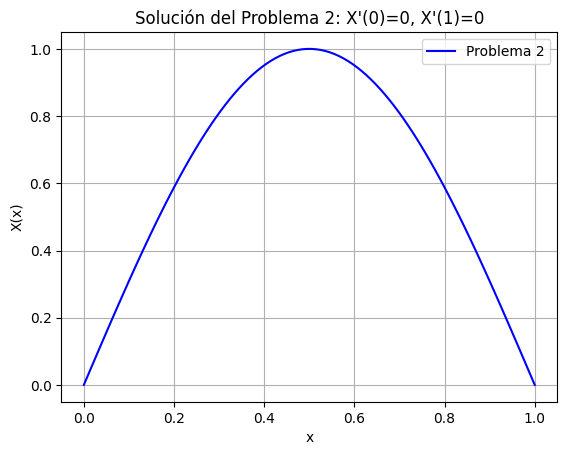

In [158]:
xx = np.linspace(0, 1, 100)
yy2 = func2(xx)

# Graficar
plt.plot(xx, yy2, 'b', label='Problema 2')
plt.xlabel('x')
plt.ylabel('X(x)')
plt.title("Solución del Problema 2: X'(0)=0, X'(1)=0")
plt.grid(True)
plt.legend()
plt.show()
